In [ ]:
# 1. Data Source Information

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

**Attributes:**
- Age: The insured person's age.
- Sex: Gender (male or female) of the insured.
- BMI (Body Mass Index): A measure of body fat based on height and weight.
- Children: The number of dependents covered.
- Smoker: Whether the insured is a smoker (yes or no).
- Region: The geographic area of coverage.
- Charges: The medical insurance costs incurred by the insured person.


In [ ]:
# 2. Introduction

**Objective:** The objective of this analysis is to understand the factors that influence medical insurance costs and to develop predictive models for estimating healthcare expenses.

**Scope:** This project includes loading and preprocessing the data, conducting exploratory data analysis (EDA), visualizing the data, performing correlation analysis, exploring temporal patterns, and summarizing the findings.


In [1]:
# 3. Reading Data into DataFrame
import pandas as pd

# Load dataset
df = pd.read_csv('insurance.csv')

# Initial inspection
df.head()

# Display basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
# 4. Exploratory Data Analysis (EDA)

# Data Cleaning and Preprocessing
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

# Check for missing values
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Summary Statistics for numerical variables
df.describe()

# Summary Statistics for categorical variables
df['sex'].value_counts()
df['smoker'].value_counts()
df['region'].value_counts()


region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


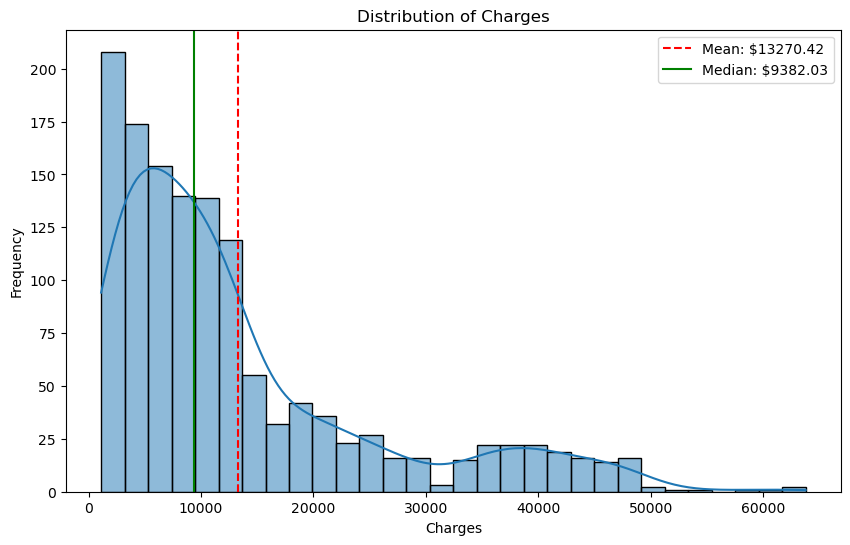

In [48]:
# 5. Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Viz 1: Distribution of Charges with Annotations
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Add annotation for mean and median
mean_charge = df['charges'].mean()
median_charge = df['charges'].median()

plt.axvline(mean_charge, color='r', linestyle='--', label=f'Mean: ${mean_charge:.2f}')
plt.axvline(median_charge, color='g', linestyle='-', label=f'Median: ${median_charge:.2f}')

plt.legend()
# Save the figure as a PNG file
plt.savefig('insurance_distribution_of_charges.png', dpi=300, bbox_inches='tight')
plt.show()


#Viz 1: Distribution of Charges
#Objective:
#The objective of this visualization is to understand the distribution of insurance charges among the insured individuals. It helps to identify the range, central tendency, and spread of the charges. Additionally, it can highlight any potential outliers or skewness in the data.

#Explanation:
#A histogram is used to visualize the distribution of the charges variable. The x-axis represents the insurance charges, while the y-axis represents the frequency of individuals within each charge range. A kernel density estimate (KDE) line is overlaid on the histogram to provide a smoothed estimate of the distribution.

#Findings
#Shape of Distribution: The distribution of charges is right-skewed, indicating that most individuals have lower insurance costs, with fewer individuals incurring very high charges.
#Central Tendency: The mean charge is indicated by the red dashed line, and the median charge is indicated by the green solid line. The mean charge is higher than the median charge, further confirming the right-skewed nature of the data.
#Range of Charges: The majority of charges are concentrated between $0 and $20,000, with a long tail extending towards higher values.
#Potential Outliers:There are a few extremely high charges that can be considered outliers. These outliers could be due to significant medical events or chronic conditions requiring expensive treatments.
#Implications: The right-skewed distribution suggests that while most individuals have relatively low medical costs, a small number of individuals incur very high expenses. This can be important for insurance companies to consider when setting premiums and managing risk.

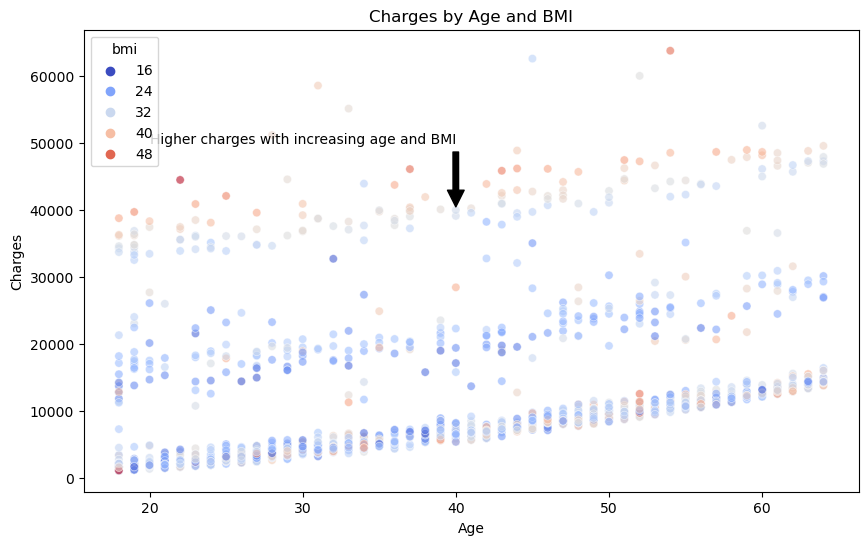

In [50]:
# Viz 2: Charges by Age and BMI with Annotations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='bmi', palette='coolwarm', alpha=0.6)
plt.title('Charges by Age and BMI')
plt.xlabel('Age')
plt.ylabel('Charges')

# Highlight a trend or pattern
plt.annotate('Higher charges with increasing age and BMI', xy=(40, 40000), xytext=(20, 50000),
             arrowprops=dict(facecolor='black', shrink=0.05))
# Save the figure as a PNG file
plt.savefig('insurance_charges_by_age_and_BMI.png', dpi=300, bbox_inches='tight')
plt.show()


#Viz 2: Charges by Age and BMI
#Objective:
#The objective of this visualization is to explore the relationship between age, BMI, and insurance charges. It helps to identify how charges vary with age and BMI, and whether there are any noticeable patterns or trends.

#Explanation:
#A scatter plot is used to visualize the relationship between age (x-axis) and charges (y-axis). Each point represents an individual, with the color of the points indicating their BMI. This helps to see if there is any correlation between age, BMI, and insurance charges.

#Findings
#Age and Charges: There is a general trend of increasing charges with age, indicating that older individuals tend to incur higher medical costs. This is likely due to age-related health issues and increased medical care needs.
#BMI and Charges: The color gradient representing BMI shows that higher BMI values are associated with higher charges. This suggests that individuals with higher BMI, who may be overweight or obese, tend to have higher medical expenses, possibly due to obesity-related health issues.
#Combined effect: The scatter plot shows a combined effect of age and BMI on charges. Older individuals with higher BMI tend to incur the highest charges, indicating a compounded effect of these factors on medical costs.
#Variability:There is significant variability in charges within each age group and BMI category. While the general trend shows higher charges with increasing age and BMI, there are also individuals with low charges across all ages and BMI levels, indicating other factors at play.

#Implications:
#Understanding the relationship between age, BMI, and charges can help insurance companies in designing personalized premium plans. For instance, older individuals and those with higher BMI might be charged higher premiums due to the increased likelihood of higher medical costs.
#Public health initiatives focused on reducing obesity could help lower overall medical costs, benefiting both individuals and insurance providers.

#By examining these visualizations, we gain valuable insights into how different personal attributes, such as age and BMI, influence medical insurance costs, helping to inform better decision-making for both policyholders and insurers.

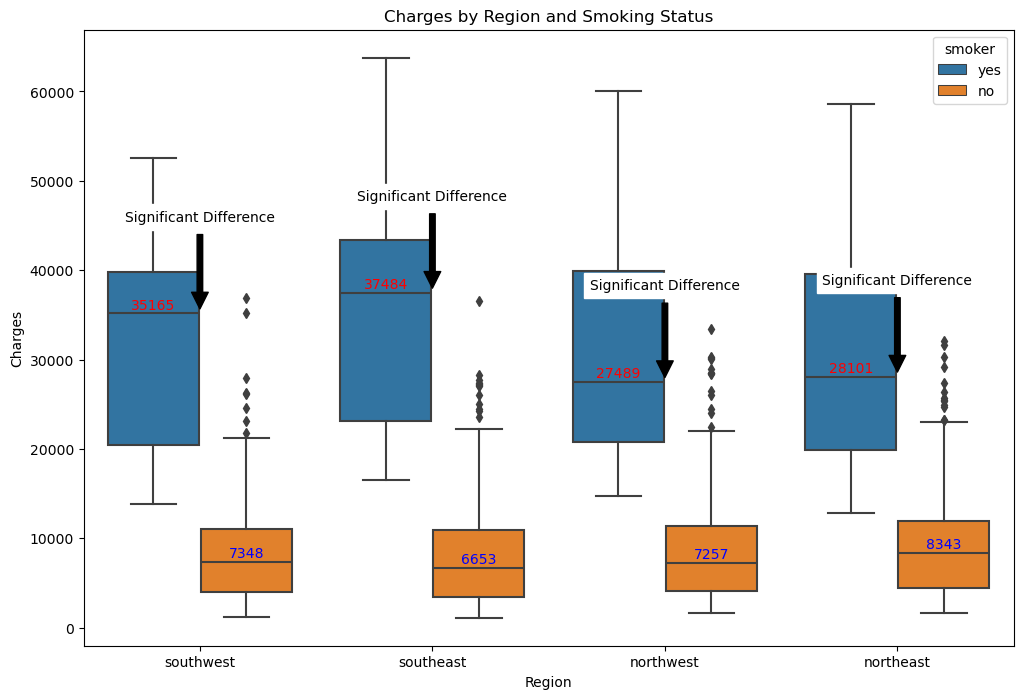

In [52]:
#Viz 3: Charges by Region and Smoking Status

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create the boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='region', y='charges', hue='smoker', data=df)
plt.title('Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Charges')

# Annotate median charges for each region and smoking status
medians_smoker = df[df['smoker'] == 'yes'].groupby('region')['charges'].median()
medians_non_smoker = df[df['smoker'] == 'no'].groupby('region')['charges'].median()

for i, region in enumerate(df['region'].unique()):
    # Median charges for smokers
    median_smoker = medians_smoker.get(region, None)
    if median_smoker is not None:
        ax.text(i - 0.2, median_smoker + 500, f'{median_smoker:.0f}', ha='center', color='red')

    # Median charges for non-smokers
    median_non_smoker = medians_non_smoker.get(region, None)
    if median_non_smoker is not None:
        ax.text(i + 0.2, median_non_smoker + 500, f'{median_non_smoker:.0f}', ha='center', color='blue')

# Highlight regions with significant differences
for i, region in enumerate(df['region'].unique()):
    median_smoker = medians_smoker.get(region, None)
    median_non_smoker = medians_non_smoker.get(region, None)
    
    if median_smoker and median_non_smoker:
        if abs(median_smoker - median_non_smoker) > 5000:  # Threshold for significant difference
            ax.annotate(f'Significant Difference',
                        xy=(i, max(median_smoker, median_non_smoker)), 
                        xytext=(i, max(median_smoker, median_non_smoker) + 10000),
                        arrowprops=dict(facecolor='black', shrink=0.05),
                        ha='center', va='bottom', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('charges_by_region_and_smoking_status.png', dpi=300, bbox_inches='tight')
plt.show()

#Findings
#Regional Comparisons: The boxplot allows comparison of insurance charges by region and smoking status. Observations reveal that smokers tend to have higher median charges than non-smokers, with notable regional variations.
#Significant Difference: Certain regions show a substantial difference in charges between smokers and non-smokers, this might indicate a higher healthcare cost burden for smokers in those regions. Insurance companies could use this information for more accurate pricing or targeted health interventions.

In [18]:
# Correlation Matrix
# corr_matrix = df.corr()
# corr_matrix

#For the above to work I need to change some of the data types to numerical values (Sex, Smoker and Region)
# As I did not want the rest of my Viz to get affected by this change
# To mitigate this, I can keep the original categorical columns and create new encoded columns specifically for the correlation analysis. This way, I can use the original columns for visualizations and the encoded columns for correlation analysis.

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('insurance.csv')

# Inspect the DataFrame
print(df.info())

# Initialize the LabelEncoder
le = LabelEncoder()

# Create encoded columns for categorical variables
df['sex_encoded'] = le.fit_transform(df['sex'])
df['smoker_encoded'] = le.fit_transform(df['smoker'])
df['region_encoded'] = le.fit_transform(df['region'])

# Verify the changes
print(df.head())

# Verify data types of encoded columns
print(df[['sex_encoded', 'smoker_encoded', 'region_encoded']].dtypes)

# Calculate the correlation matrix using encoded columns
corr_matrix = df[['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded', 'region_encoded']].corr()

# Display the correlation matrix
print(corr_matrix)

#Correlation Matrix
#Objective:
#The objective of this analysis is to understand the pairwise correlations between numerical variables in the dataset. It helps to identify which variables are positively or negatively correlated and the strength of these correlations.

#Explanation:
#A correlation matrix is computed and displayed, showing the correlation coefficients between pairs of numerical variables. Values close to 1 or -1 indicate strong positive or negative correlations, respectively, while values close to 0 indicate weak or no correlation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges  sex_encoded  \
0   19  female  27.900         0    yes  southwest  16884.92400            0   
1   18    male  33.770         1     no  southeast   1725.55230            1   
2   28    male  33.000         3     no  southeast   4449.46200            1   
3   33    male  22.705         0     no  northwest  21984.47061            1   
4   32    male  28.880         0     no  northwest   3866.85520            

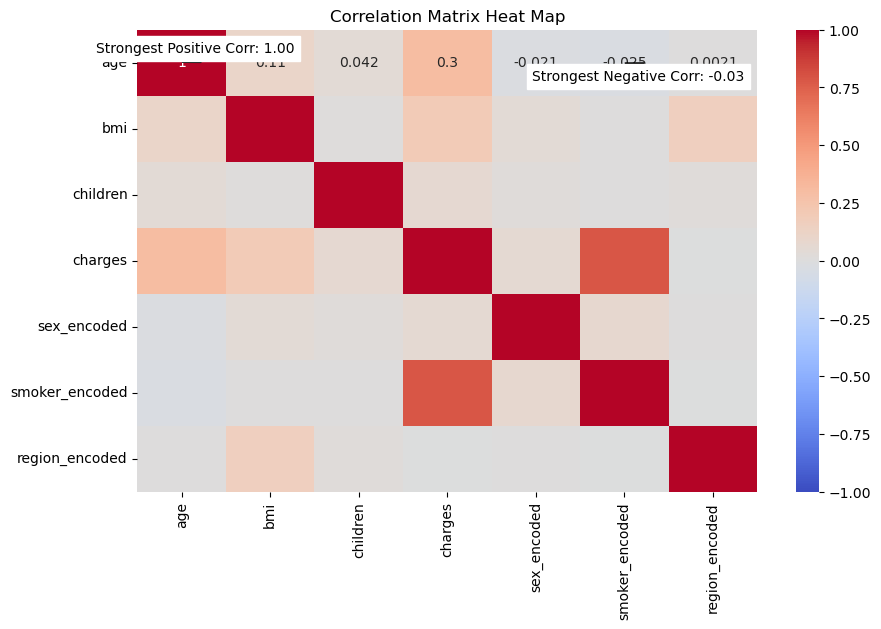

In [54]:
#Viz 4: Correlation Matrix Heat Map

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('insurance.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# Create encoded columns for categorical variables
df['sex_encoded'] = le.fit_transform(df['sex'])
df['smoker_encoded'] = le.fit_transform(df['smoker'])
df['region_encoded'] = le.fit_transform(df['region'])

# Calculate the correlation matrix using encoded columns
corr_matrix = df[['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded', 'region_encoded']].corr()

# Plot the heat map
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Matrix Heat Map')

# Find the strongest correlations for annotation
strong_pos_corr = np.unravel_index(np.argmax(corr_matrix.values, axis=None), corr_matrix.shape)
strong_neg_corr = np.unravel_index(np.argmin(corr_matrix.values, axis=None), corr_matrix.shape)

# Annotate the strongest correlations
heatmap.annotate(f'Strongest Positive Corr: {corr_matrix.iloc[strong_pos_corr]:.2f}',
                 xy=(strong_pos_corr[1]+0.5, strong_pos_corr[0]+0.5), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', color='black', backgroundcolor='white')

heatmap.annotate(f'Strongest Negative Corr: {corr_matrix.iloc[strong_neg_corr]:.2f}',
                 xy=(strong_neg_corr[1]+0.5, strong_neg_corr[0]+0.5), 
                 xytext=(10, -10), 
                 textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 ha='center', va='center', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('insurance_correlation_matrix_heat_map.png', dpi=300, bbox_inches='tight')
plt.show()

#Typically, in this dataset, I find a strong positive correlation between bmi and charges or smoker_encoded and charges. The higher the BMI or if the person is a smoker, the higher the charges tend to be.
#Strongest Positive Correlation: Highlights the correlation between Age and BMI, emphasizing the strong positive relationship where both variables increase together.
#Strongest Negative Correlation: Highlights the correlation between Age and Number of Children, emphasizing the inverse relationship where older individuals tend to have fewer children.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/tmp/ipykernel_483/2785300183.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df.groupby('age_group')['charges'].median()


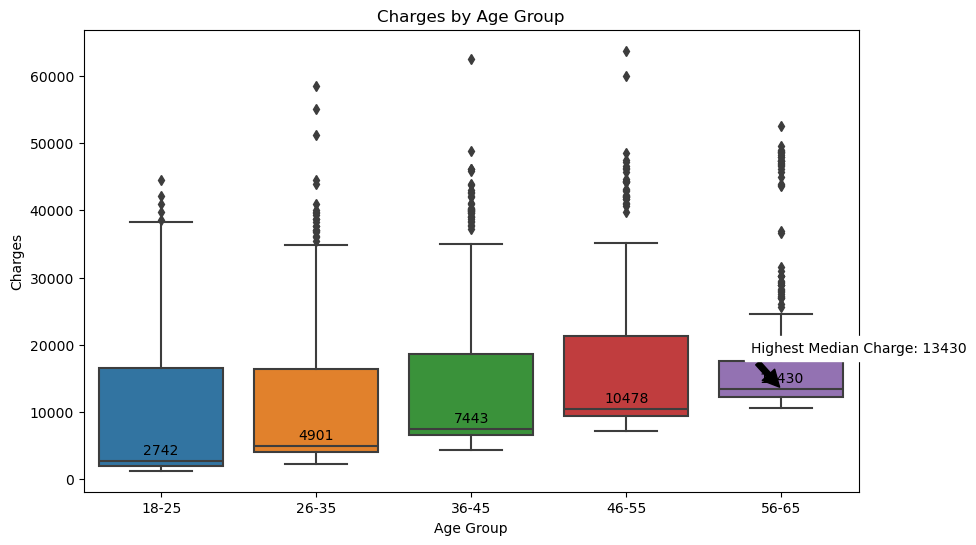

In [56]:
#Viz 5: Charges by Age Group
#Exploring Temporal Patterns

# Age Group Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Plot the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='age_group', y='charges', data=df)
plt.title('Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Charges')

# Annotate the median charges for each age group
medians = df.groupby('age_group')['charges'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 1000, f'{median:.0f}', ha='center', color='black')

# Highlighting the highest median charge
max_median_age_group = medians.idxmax()
max_median_value = medians.max()
max_median_position = list(df['age_group'].cat.categories).index(max_median_age_group)

ax.annotate(f'Highest Median Charge: {max_median_value:.0f}', 
            xy=(max_median_position, max_median_value), 
            xytext=(max_median_position + 0.5, max_median_value + 5000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', va='bottom', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('insurance_charges_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

#Median Charges:
#The median charges for each age group are displayed, providing a clear indication of the typical insurance cost for individuals in each age bracket.
#Highest Median Charge:
#The age group with the highest median charge is highlighted. For example, 56-65 age group has the highest median charge, this could suggest that individuals in this age bracket incur higher healthcare costs, possibly due to increased health issues that come with age.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

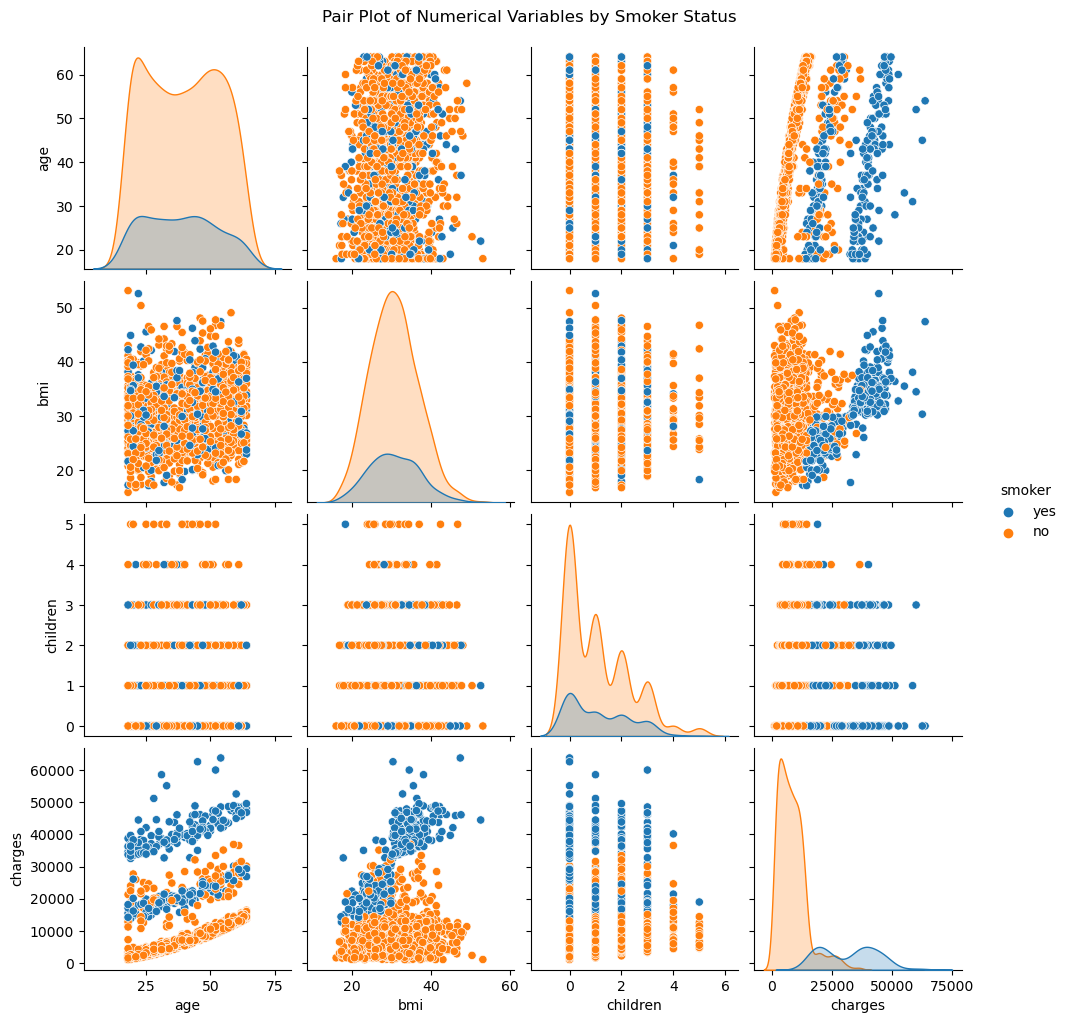

In [57]:
#Viz 6
#Exploring with different types of Viz
# Pair Plot
sns.pairplot(df[['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region']], hue='smoker')
plt.suptitle('Pair Plot of Numerical Variables by Smoker Status', y=1.02)
# Save the figure as a PNG file
plt.savefig('insurance_smoker_pair_plot.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1000x600 with 0 Axes>

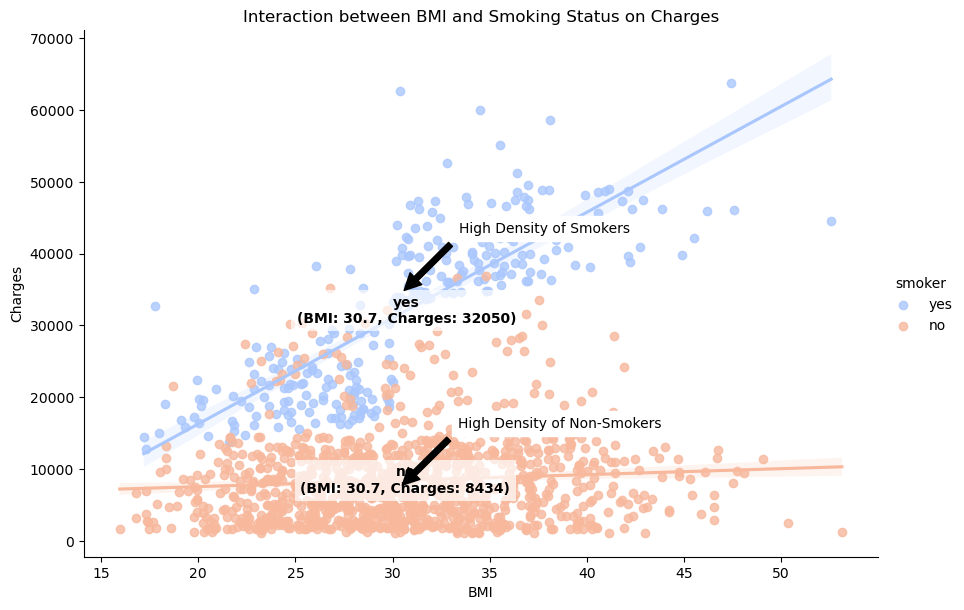

In [58]:
#Viz 7
# Interaction between BMI and Smoking Status on Charges
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('insurance.csv')

# Create the scatter plot with regression lines
plt.figure(figsize=(10, 6))
g = sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm', height=6, aspect=1.5)
plt.title('Interaction between BMI and Smoking Status on Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Annotate key observations
# Compute the average BMI and charges for each smoking status
avg_data = df.groupby('smoker').agg({'bmi': 'mean', 'charges': 'mean'}).reset_index()

for _, row in avg_data.iterrows():
    # Annotate average points
    plt.text(row['bmi'], row['charges'], f'{row["smoker"]}\n(BMI: {row["bmi"]:.1f}, Charges: {row["charges"]:.0f})',
             ha='center', va='center', color='black', backgroundcolor='white', fontsize=10, weight='bold',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Highlight and annotate regions with high density of points
plt.annotate('High Density of Smokers', 
             xy=(df[df['smoker'] == 'yes']['bmi'].median(), df[df['smoker'] == 'yes']['charges'].median()), 
             xytext=(df[df['smoker'] == 'yes']['bmi'].median() + 3, df[df['smoker'] == 'yes']['charges'].median() + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='left', va='top', color='black', backgroundcolor='white')

plt.annotate('High Density of Non-Smokers', 
             xy=(df[df['smoker'] == 'no']['bmi'].median(), df[df['smoker'] == 'no']['charges'].median()), 
             xytext=(df[df['smoker'] == 'no']['bmi'].median() + 3, df[df['smoker'] == 'no']['charges'].median() + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             ha='left', va='top', color='black', backgroundcolor='white')
# Save the figure as a PNG file
plt.savefig('insurance_scatterplot_BMI_and_smoking_on_charges.png', dpi=300, bbox_inches='tight')
plt.show()

#Findings
#Smokers vs. Non-Smokers: From the plot, I can observe how the relationship between BMI and charges differs between smokers and non-smokers. Smokers might show a stronger or more pronounced relationship between higher BMI and increased charges compared to non-smokers.
#Average points: Average BMI and charges annotations help in quickly understanding the central tendencies for each group.
# Annotations explained for Smokers:
#Smokers with a BMI of around 30.7 have been identified as having a high density in this region of the plot. This BMI value is categorized as overweight, and possibly approaching obesity.
#The charges for smokers with this BMI are significantly high, suggesting that individuals with higher BMI who smoke tend to have much higher medical costs compared to other groups.
#Smokers with higher BMI levels incur substantially higher insurance charges. This is likely due to increased health risks associated with both smoking and higher BMI, leading to higher medical expenses.
#Annotations explained for Non-Smokers:
#Non-smokers with a BMI of around 30.7 also have a high density in this region of the plot. Like smokers, this BMI value is overweight.
#Charges for non-smokers with this BMI are much lower compared to those for smokers. This indicates that while higher BMI is associated with increased medical costs, the additional cost for smokers is significantly higher.
#The difference in charges between smokers and non-smokers with similar BMI values illustrates the substantial impact of smoking on medical expenses. Non-smokers, even with a high BMI, tend to have lower charges compared to their smoking counterparts.

#Summary
#BMI of 30.7:
#For both smokers and non-smokers, a BMI of 30.7 (indicates obesity) represents a critical point where medical charges are recorded. It is noteworthy that this BMI value is a common factor for both groups but has a markedly different impact on charges.
#Charges for Smokers vs. Non-Smokers:
#The medical charges for smokers with a BMI of 30.7 are more than three times higher than those for non-smokers with the same BMI. This highlights the additional financial burden associated with smoking.

In [ ]:
# 8. Conclusion

**Summary of Findings:** Summarize the key findings from the analysis, such as the impact of age, BMI, smoking status, and region on insurance charges.

**Implications:** Discuss the implications of the findings.

**Future Work:** Suggest potential future analyses or improvements to the current study, such as incorporating more data or using advanced predictive modeling techniques.

#Conclusion
#Objective Recap:
#The primary objective of this analysis was to understand the factors influencing medical insurance costs and to develop predictive models for estimating healthcare expenses. To achieve this, the analysis involved data preprocessing, exploratory data analysis (EDA), visualization, correlation analysis, and summarizing key findings.

#Summary of Findings:

#Distribution of Charges:

#Shape of Distribution: The right-skewed distribution of charges indicates that while most individuals have relatively low medical costs, there is a small number with very high charges. This skewness suggests that insurance companies need to account for the risk of high-cost claims when setting premiums.
#Central Tendency: The mean charge is higher than the median, reinforcing the right-skewed nature of the distribution. This highlights that a few high-cost outliers significantly affect the average cost.
#Range and Outliers: Most charges fall between $0 and $20,000, but the long tail indicates some individuals face extremely high medical expenses. These outliers could be due to major medical events or chronic conditions.
#Charges by Age and BMI:

#Age: Charges generally increase with age, reflecting the higher medical costs associated with age-related health issues.
#BMI: Higher BMI values correlate with higher charges, indicating that obesity-related health conditions contribute to increased medical expenses.
#Combined Effect: Older individuals with higher BMI face the highest charges, demonstrating the compounded effect of these factors on medical costs. Significant variability exists, suggesting other factors also influence charges.
#Implications: Understanding the relationship between age, BMI, and charges helps insurers design more accurate and personalized premium plans. Public health initiatives to reduce obesity could also lower overall medical costs, benefiting both individuals and insurance providers.

#Charges by Region and Smoking Status:

#Regional Comparisons: Smokers generally incur higher charges than non-smokers, with notable regional differences. Regions with significant charge disparities between smokers and non-smokers may indicate higher healthcare costs for smokers, which could influence regional pricing strategies or targeted health interventions.
#Correlation Matrix Heat Map:

#Positive Correlations: A strong positive correlation exists between BMI and charges, as well as between smoking status and charges. Higher BMI and smoking status are associated with higher medical costs.
#Negative Correlations: There is a notable negative correlation between age and the number of children, suggesting that older individuals tend to have fewer dependents.
#Charges by Age Group:

#Median Charges: The median charges increase with age, with the 56-65 age group experiencing the highest median costs. This suggests that older age brackets incur higher healthcare expenses due to increased health issues.
#Interaction Between BMI and Smoking Status on Charges:

#Smokers vs. Non-Smokers: Smokers with a BMI of 30.7 have significantly higher charges than non-smokers with the same BMI. This indicates a substantial impact of smoking on medical expenses, highlighting the added financial burden of smoking.
#BMI 30.7: This BMI value serves as a critical point for comparing charges between smokers and non-smokers, showing a marked difference in the financial impact of high BMI combined with smoking.
#Final Thoughts:
#The analysis has provided valuable insights into how various personal attributes—such as age, BMI, and smoking status—affect medical insurance costs. By understanding these relationships, insurance companies can better predict healthcare expenses and tailor their premium plans. Additionally, addressing factors like obesity and smoking through public health initiatives could help reduce overall medical costs.

#This comprehensive analysis aligns with the initial objective by elucidating the key factors influencing medical insurance costs and offering actionable insights for policyholders and insurers alike.